<a href="https://colab.research.google.com/github/RakinduM/AI-weather-forecast/blob/feat%2Ftrain-a-model-using-1D-CNN/1D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 20, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 8, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,857 (226.00 KB)

 Trainable params: 57,857 (226.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8205 - auc: 0.8006 - loss: 0.4157 - val_accuracy: 0.8453 - val_auc: 0.8700 - val_loss: 0.3567
Epoch 2/30
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8404 - auc: 0.8520 - loss: 0.3718 - val_accuracy: 0.8478 - val_auc: 0.8744 - val_loss: 0.3508
Epoch 3/30
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8423 - auc: 0.8576 - loss: 0.3659 - val_accuracy: 0.8502 - val_auc: 0.8764 - val_loss: 0.3469
Epoch 4/30
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8438 - auc: 0.8629 - loss: 0.3606 - val_accuracy: 0.8517 - val_auc: 0.8779 - val_loss: 0.3461
Epoch 5/30
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8452 - auc: 0.8655 - loss: 0.3584 - val_accuracy: 0.8522 - val_auc: 0.8792 - val_loss: 0.3434
Epoch 6/30
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8461 - auc: 0.8669 - loss: 0.3564 - val_accuracy: 0.8515 - val_auc: 0.8798 - val_loss: 0.3432
Epoch 7/30
1422/

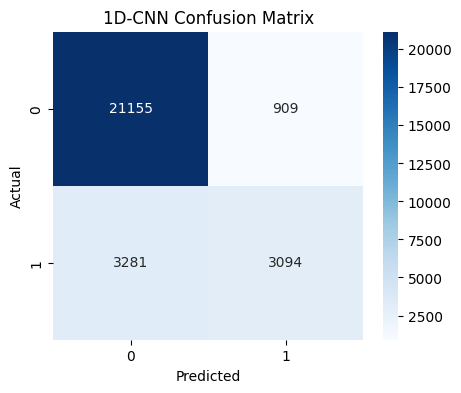

In [10]:
# ===================== Rain Prediction in Australia =====================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# -------------------- 1. Load and Clean Data --------------------
df = pd.read_csv("weatherAUS.csv")

# Convert Date and remove rows with missing target
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df = df.dropna(subset=["RainTomorrow"])
df["RainTomorrow"] = df["RainTomorrow"].map({"Yes": 1, "No": 0})

# -------------------- 2. Feature Engineering --------------------
df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.dayofweek
df["Season"] = ((df["Month"] % 12 + 3) // 3)

if "RainToday" in df.columns:
    df["RainToday"] = df["RainToday"].map({"Yes": 1, "No": 0})
else:
    df["RainToday"] = 0

# Fill missing numerical features with median
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Fill missing categorical features with "Missing"
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna("Missing")

# -------------------- 3. Choose Features --------------------
numeric_features = [
    'MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine',
    'WindGustSpeed','WindSpeed9am','WindSpeed3pm',
    'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',
    'Temp9am','Temp3pm'
]

categorical_features = ['Location','WindGustDir','WindDir9am','WindDir3pm','Season','Month','DayOfWeek']

all_features = numeric_features + categorical_features + ["RainToday","RainTomorrow"]
df = df[[col for col in all_features if col in df.columns]]

# -------------------- 4. Encode Categorical Columns --------------------
le = LabelEncoder()
for col in categorical_features:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

# -------------------- 5. Split Data --------------------
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------- 6. Scaling --------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape to 3D for Conv1D: (samples, features, 1)
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# -------------------- 7. Build 1D-CNN Model --------------------
def build_cnn1d(num_features):
    model = keras.Sequential([
        layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(num_features, 1)),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),
        layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=[keras.metrics.BinaryAccuracy(name='accuracy'),
                           keras.metrics.AUC(name='auc')])
    return model

cnn_model = build_cnn1d(num_features=X_train_cnn.shape[1])
cnn_model.summary()

# -------------------- 8. Train Model --------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_cnn = cnn_model.fit(
    X_train_cnn, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# -------------------- 9. Evaluate Model --------------------
y_pred_proba = cnn_model.predict(X_test_cnn).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_pred_proba)

print("\n CNN Evaluation Metrics:")
print(f"Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}  AUC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -------------------- 10. Confusion Matrix --------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("1D-CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
